#Paquetes necesarios

In [2]:
import cv2  
import math 
from ultralytics import YOLO
import easyocr
import pytesseract
import glob
import numpy as np


DETECCIÓN DE MATRICULAS. Detecto el coche y las matriculas con YOLO y uso easyOCR para conseguir la matricula. (Imágenes Estáticas)

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.

0: 288x416 1 license-plate, 1 vehicle, 51.0ms
Speed: 2.2ms preprocess, 51.0ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 416)


Matricula: ['[5197 KVH]']


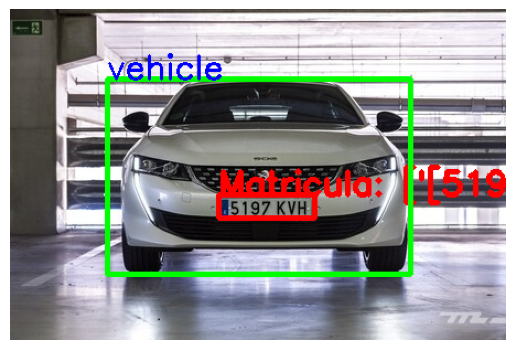


0: 320x416 1 license-plate, 3 vehicles, 66.0ms
Speed: 2.0ms preprocess, 66.0ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)


Matricula: ['6628 GXR']


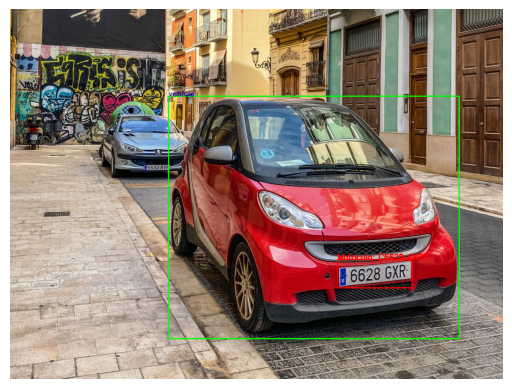


0: 320x416 1 license-plate, 3 vehicles, 97.5ms
Speed: 1.0ms preprocess, 97.5ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)


Matricula: ['u']


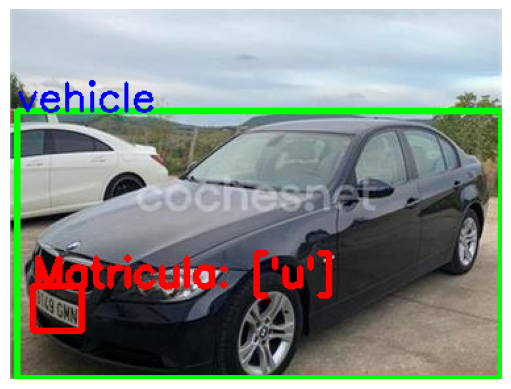


0: 160x416 1 license-plate, 1 vehicle, 28.2ms
Speed: 1.0ms preprocess, 28.2ms inference, 1.0ms postprocess per image at shape (1, 3, 160, 416)


Matricula: ['[3LE3 FPK']


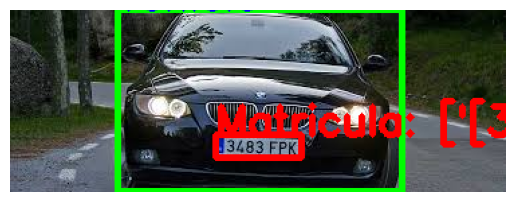


0: 192x416 1 license-plate, 1 vehicle, 56.1ms
Speed: 1.0ms preprocess, 56.1ms inference, 1.0ms postprocess per image at shape (1, 3, 192, 416)


Matricula: ['RT8BB221']


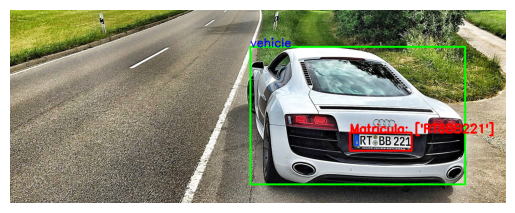


0: 256x416 1 license-plate, 1 vehicle, 57.6ms
Speed: 3.0ms preprocess, 57.6ms inference, 1.1ms postprocess per image at shape (1, 3, 256, 416)


Matricula: ['[6852 KWS']


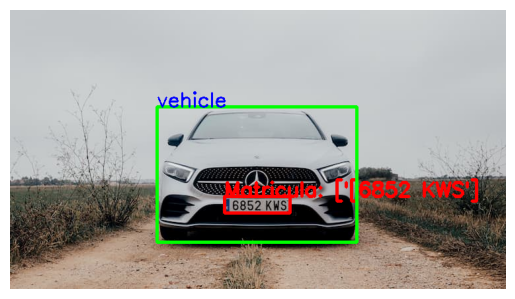


0: 288x416 1 license-plate, 1 vehicle, 127.5ms
Speed: 2.3ms preprocess, 127.5ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 416)


Matricula: ['2021', 'AFR']


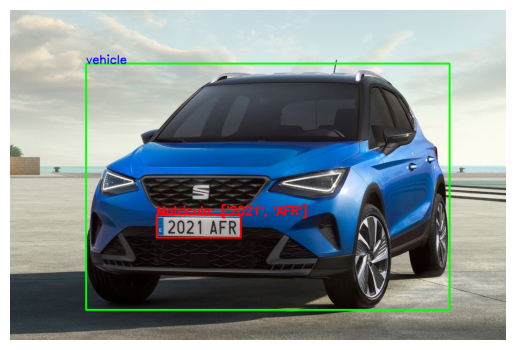

In [18]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches


#Carga del modelo de lengua
reader = easyocr.Reader(['es']) 

#Reconocimiento de una imagen

# Carga del modelo YOLOv8 combinado
model_combined = YOLO('yolov8combinada.pt')

# Configuración de Tesseract OCR
pytesseract.pytesseract.tesseract_cmd = r'C:/Program Files/Tesseract-OCR/tesseract'

# Clases de objetos para vehículos y matrículas
class_names_combined = ["license_plate", "vehicle"]

# Lista de nombres de imágenes
image_filenames = glob.glob('./images/*.jpg')

# Procesar cada imagen
for image_filename in image_filenames:
    # Cargar la imagen
    img = cv2.imread(image_filename)

    results_combined = model_combined(img)

    # Para cada detección
    for r_combined in results_combined:
        boxes_combined = r_combined.boxes

        for box_combined in boxes_combined:
            # Contenedor
            x1_combined, y1_combined, x2_combined, y2_combined = box_combined.xyxy[0]
            x1_combined, y1_combined, x2_combined, y2_combined = int(x1_combined), int(y1_combined), int(x2_combined), int(y2_combined)

            # Clase
            cls_combined = int(box_combined.cls[0])
            
            # Confianza de la detección
            confidence_combined = box_combined.conf[0]

            # Si la clase es un vehículo y la confianza es mayor a 0.5
            if class_names_combined[cls_combined] == "vehicle" and confidence_combined > 0.5:
                # Si la clase es un vehículo, dibujar el contenedor
                cv2.rectangle(img, (x1_combined, y1_combined), (x2_combined, y2_combined), (0, 255, 0), 3)
                cv2.putText(img, class_names_combined[cls_combined], [x1_combined, y1_combined], cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

            # Si la clase es una matrícula y la confianza es mayor a 0.5
            elif class_names_combined[cls_combined] == "license_plate" and confidence_combined > 0.3:
                # Recorta la región de la matrícula
                gray_plate = cv2.cvtColor(img[y1_combined:y2_combined, x1_combined:x2_combined], cv2.COLOR_BGR2GRAY)

                # Aplica suavizado (filtro Gaussiano)
                blurred_plate = cv2.GaussianBlur(gray_plate, (3, 3), 0)

                # Aplica detección de bordes con Canny
                sobelx = cv2.Sobel(blurred_plate, cv2.CV_64F, 1, 0)  # x
                sobely = cv2.Sobel(blurred_plate, cv2.CV_64F, 0, 1)  # y
                #Combina ambos resultados
                sobel = cv2.add(sobelx, sobely)

                
                # Aplica Tesseract OCR
                plate_text = result = reader.readtext(gray_plate,detail=0)

                # Dibuja el contenedor y clase de matrícula
                cv2.rectangle(img, (x1_combined, y1_combined), (x2_combined, y2_combined), (0, 0, 255), 3)
                cv2.putText(img, f'Matricula: {plate_text}', (x1_combined, y1_combined), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 0, 255), 3)
                print( f'Matricula: {plate_text}')

    # Mostrar la imagen con Matplotlib
    fig, ax = plt.subplots(1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    # Agregar rectángulos para las detecciones
    for box_combined in boxes_combined:
        x1, y1, x2, y2 = box_combined.xyxy[0]
        rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor='r', facecolor='none')

    # Configuraciones adicionales
    plt.axis('off')
    plt.show()

DETECCIÓN DE MATRICULAS. Detecto sólamente el coche con YOLO y luego detecto bordes y fitro para conseguir para matrícula a través de pytesseract. (Imágenes Estáticas)

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.



0: 288x416 1 license-plate, 1 vehicle, 66.0ms
Speed: 2.0ms preprocess, 66.0ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 416)


Matrícula: 05197 KVH)


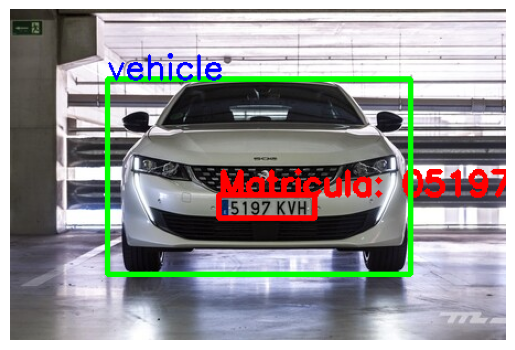


0: 320x416 1 license-plate, 3 vehicles, 62.9ms
Speed: 6.0ms preprocess, 62.9ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)


Matrícula: 6628 GXR


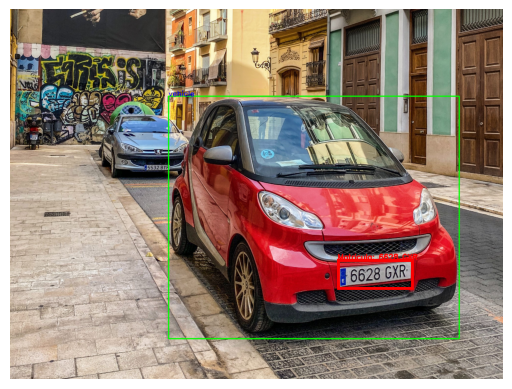


0: 320x416 1 license-plate, 3 vehicles, 45.9ms
Speed: 1.0ms preprocess, 45.9ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)


Matrícula: JD


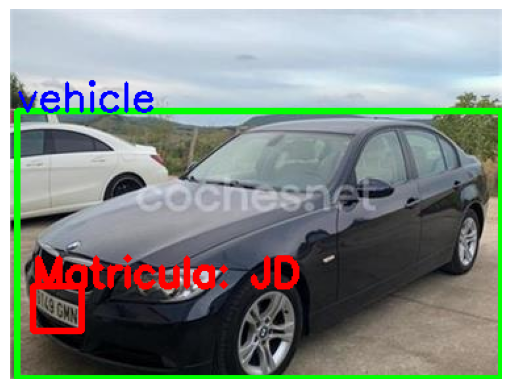


0: 160x416 1 license-plate, 1 vehicle, 37.2ms
Speed: 1.0ms preprocess, 37.2ms inference, 0.0ms postprocess per image at shape (1, 3, 160, 416)


Matrícula: [34B3 FPK


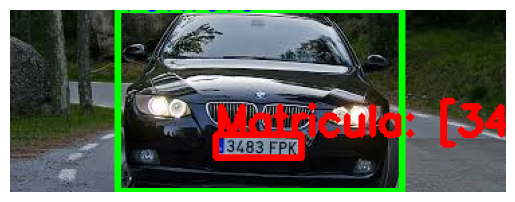


0: 192x416 1 license-plate, 1 vehicle, 48.8ms
Speed: 0.0ms preprocess, 48.8ms inference, 1.0ms postprocess per image at shape (1, 3, 192, 416)


Matrícula: RTBB221


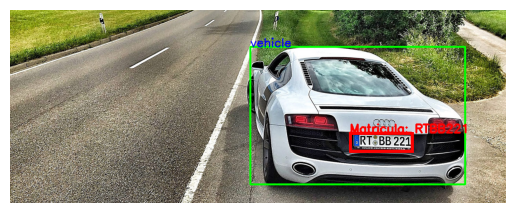


0: 256x416 1 license-plate, 1 vehicle, 47.0ms
Speed: 1.0ms preprocess, 47.0ms inference, 0.0ms postprocess per image at shape (1, 3, 256, 416)


Matrícula: [6852 KWS]


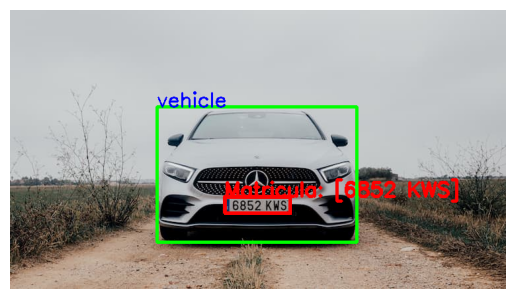


0: 288x416 1 license-plate, 1 vehicle, 112.5ms
Speed: 1.4ms preprocess, 112.5ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 416)


Matrícula: 2021


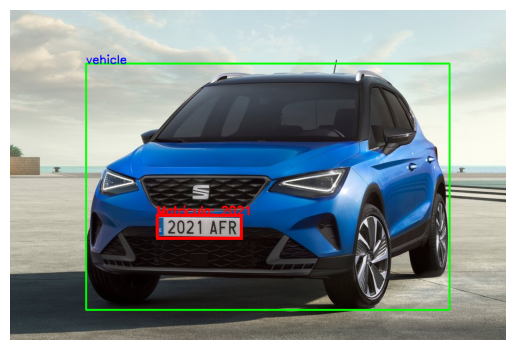

In [24]:
# Carga del modelo de lengua
reader = easyocr.Reader(['en']) 

# Carga del modelo YOLOv8 combinado
model_combined = YOLO('yolov8combinada.pt')

# Clases de objetos para vehículos y matrículas
class_names_combined = ["license_plate", "vehicle"]

# Lista de nombres de imágenes
image_filenames = glob.glob('./images/*.jpg')

# Procesar cada imagen
for image_filename in image_filenames:
    # Cargar la imagen
    img = cv2.imread(image_filename)

    results_combined = model_combined(img)
    
    # Lista para almacenar todas las cajas
    all_boxes_combined = []

    # Para cada detección
    for r_combined in results_combined:
        boxes_combined = r_combined.boxes

        for box_combined in boxes_combined:
            # Contenedor
            x1_combined, y1_combined, x2_combined, y2_combined = box_combined.xyxy[0]
            x1_combined, y1_combined, x2_combined, y2_combined = int(x1_combined), int(y1_combined), int(x2_combined), int(y2_combined)

            # Clase
            cls_combined = int(box_combined.cls[0])
            
            # Confianza de la detección
            confidence_combined = box_combined.conf[0]

            # Si la clase es un vehículo y la confianza es mayor a 0.5
            if class_names_combined[cls_combined] == "vehicle" and confidence_combined > 0.5:
                # Si la clase es un vehículo, dibujar el contenedor
                cv2.rectangle(img, (x1_combined, y1_combined), (x2_combined, y2_combined), (0, 255, 0), 3)
                cv2.putText(img, class_names_combined[cls_combined], [x1_combined, y1_combined], cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

            # Si la clase es una matrícula y la confianza es mayor a 0.3
            elif class_names_combined[cls_combined] == "license_plate" and confidence_combined > 0.3:
                # Recorta la región de la matrícula
                gray_plate = cv2.cvtColor(img[y1_combined:y2_combined, x1_combined:x2_combined], cv2.COLOR_BGR2GRAY)

                # Aplica suavizado (filtro Gaussiano)
                blurred_plate = cv2.GaussianBlur(gray_plate, (3, 3), 0)

                # Aplica detección de bordes con Canny
                sobelx = cv2.Sobel(blurred_plate, cv2.CV_64F, 1, 0)  # x
                sobely = cv2.Sobel(blurred_plate, cv2.CV_64F, 0, 1)  # y
                #Combina ambos resultados
                sobel = cv2.add(sobelx, sobely)

                # Aplica EasyOCR
                results_ocr = reader.readtext(gray_plate, detail=0)
                if results_ocr:
                    plate_text = results_ocr[0]
                    print(f'Matrícula: {plate_text}')

                    # Dibuja el contenedor y clase de matrícula
                    cv2.rectangle(img, (x1_combined, y1_combined), (x2_combined, y2_combined), (0, 0, 255), 3)
                    cv2.putText(img, f'Matricula: {plate_text}', (x1_combined, y1_combined), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 0, 255), 3)

                # Guardar cajas en la lista
                all_boxes_combined.append((x1_combined, y1_combined, x2_combined, y2_combined))

    # Mostrar la imagen con Matplotlib
    fig, ax = plt.subplots(1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    # Agregar rectángulos para las detecciones
    for box_combined in all_boxes_combined:
        x1, y1, x2, y2 = box_combined
        rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

    # Configuraciones adicionales
    plt.axis('off')
    plt.show()


Reconocimiento de vehículos y matrículas con EasyOCR

In [ ]:
# Carga del modelo YOLOv8 combinado
model_combined = YOLO('yolov8combinada.pt')

# Configuración de EasyOCR
reader = easyocr.Reader(['en'])  

# Clases de objetos para coches y matrículas
class_names_combined = ["license-plate", "vehicle"]

# Archivo de video
video_path = 'cars2.mp4'
vid = cv2.VideoCapture(video_path)

while True:
    # Fotograma a fotograma
    ret, img = vid.read()

    # Si hay imagen válida
    if ret:
        # Perform inference on the combined model
        results_combined = model_combined(img, stream=True)

        # Para cada detección de objeto (coche o matrícula)
        for r_combined in results_combined:
            boxes_combined = r_combined.boxes

            for box_combined in boxes_combined:
                # Contenedor de objeto
                x1_combined, y1_combined, x2_combined, y2_combined = box_combined.xyxy[0]
                x1_combined, y1_combined, x2_combined, y2_combined = int(x1_combined), int(y1_combined), int(x2_combined), int(y2_combined)

                # Clase de objeto
                cls_combined = int(box_combined.cls[0])

                # Si la clase es un coche o una matrícula
                if class_names_combined[cls_combined] in ["vehicle", "license-plate"]:
                    # Recorta la región del objeto 
                    gray_object = cv2.cvtColor(img[y1_combined:y2_combined, x1_combined:x2_combined], cv2.COLOR_BGR2GRAY)
                    gray_object = cv2.GaussianBlur(gray_object, (5, 5), 0)

                    if class_names_combined[cls_combined] == "license-plate":
                        results_ocr = reader.readtext(gray_object)
                        if results_ocr:
                            plate_text = results_ocr[0][1]
                            print("Matrícula:", plate_text)

                    cv2.rectangle(img, (x1_combined, y1_combined), (x2_combined, y2_combined), (0, 255, 0), 3)
                    cv2.putText(img, class_names_combined[cls_combined], [x1_combined, y1_combined], cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

        # Muestra fotograma
        cv2.imshow('Vid', img)

    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break

# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

Reconocimiento de caracteres tras instalar pytesseract y tesseract

In [3]:
# Tesseract
import cv2
import pytesseract

# Previamente debes descargar los ejecutables
# Si la ruta de Tesseract no está en el PATH, ruta al ejecutable
pytesseract.pytesseract.tesseract_cmd = r'C:/Program Files/Tesseract-OCR/tesseract'

# Lenguajes disponibles
print(pytesseract.get_languages(config=''))

#Cargo imagen y ocnvierto a RGB
img = cv2.imread('toy.tif') 
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#Aplica reconocedor a imagen cargada
print(pytesseract.image_to_string(img_rgb))

['eng', 'osd']
Hasta el infinito y mas alla



Reconocimiento de vehículos y matrículas con Tesseract

In [ ]:

# Carga del modelo YOLOv8 combinado
model_combined = YOLO('yolov8combinada.pt')

# Configuración de Tesseract OCR
pytesseract.pytesseract.tesseract_cmd = r'C:/Program Files/Tesseract-OCR/tesseract'

# Clases de objetos para coches y matrículas
class_names_combined = ["license-plate", "vehicle"]

# Archivo de video
video_path = 'cars2.mp4'
vid = cv2.VideoCapture(video_path)

while True:
    # Fotograma a fotograma
    ret, img = vid.read()

    # Si hay imagen válida
    if ret:
        # Perform inference on the combined model
        results_combined = model_combined(img, stream=True)

        # Para cada detección de objeto (coche o matrícula)
        for r_combined in results_combined:
            boxes_combined = r_combined.boxes

            for box_combined in boxes_combined:
                # Contenedor de objeto
                x1_combined, y1_combined, x2_combined, y2_combined = box_combined.xyxy[0]
                x1_combined, y1_combined, x2_combined, y2_combined = int(x1_combined), int(y1_combined), int(x2_combined), int(y2_combined)

                # Clase de objeto
                cls_combined = int(box_combined.cls[0])

                # Si la clase es un coche o una matrícula
                if class_names_combined[cls_combined] in ["vehicle", "license-plate"]:
                    # Recorta la región del objeto 
                    gray_object = cv2.cvtColor(img[y1_combined:y2_combined, x1_combined:x2_combined], cv2.COLOR_BGR2GRAY)
                    gray_object = cv2.GaussianBlur(gray_object, (5, 5), 0)

                    # Aplica Tesseract OCR solo si es una matrícula
                    if class_names_combined[cls_combined] == "license-plate":
                        plate_text = pytesseract.image_to_string(gray_object)
                        print("Matrícula:", plate_text)

                    # Dibuja el contenedor y clase del objeto
                    cv2.rectangle(img, (x1_combined, y1_combined), (x2_combined, y2_combined), (0, 255, 0), 3)
                    cv2.putText(img, class_names_combined[cls_combined], [x1_combined, y1_combined], cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

        # Muestra fotograma
        cv2.imshow('Vid', img)

    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break

# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

